In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assigns variable names to the file paths of CSV files located on my computer. Makes referencing them easier and more clear.
tlt_csv = r"C:\Users\ericp\Downloads\tlt.csv"
xbi_csv = r"C:\Users\ericp\Downloads\xbi.csv"

# Reads the CSV files into pandas dataframes and assigns them variable names for easy access
tlt = pd.read_csv(tlt_csv)
xbi = pd.read_csv(xbi_csv)

# Adds a new column 'Date' which converts the 'time' column into datetime format for easier manipulation within the dataframe.
tlt['Date'] = pd.to_datetime(tlt['time'])
xbi['Date'] = pd.to_datetime(xbi['time'])

# Removes columns 'time', 'high','low','ATR' from our Dataframes tlt and xbi, as they are not needed for our analysis. 'inplace=True' keeps our changes permanent.
tlt.drop(columns=['time','high','low','ATR'], inplace=True)
xbi.drop(columns=['time','high','low','ATR'],inplace=True)

# This sets our index column as the 'Date' column, so information in each row can be easily retrieved based on the date if need be.
xbi.set_index('Date',inplace=True)
tlt.set_index('Date',inplace=True)

# Merges our two dataframes TLT and XBI together into one dataframe, and given a new name called 'tltxbi'. The merge occurs on the 'Date' column 
# and suffixes are added to distinguish between the data coming from the TLT dataframe and the XBI dataframe.
tltxbi = pd.merge(tlt, xbi, on='Date', suffixes=('_TLT', '_XBI'))

# 3 new columns are created
# Column 1 is 'TLT Prev Close' and it is the prior day's close price of the TLT. This is achieved by shifting the column containing the closing price
# of the TLT up by 1.
# Column 2 is 'TLT Close to Open' which calculates the performance of the TLT from close to open using a simple equation of (open - previous close) / previous close
# Column 3 is 'XBI Open to Close' which calculates the perfromance of the XBI from the open to the close using the equation (close - open) / open.
tltxbi['TLT Prev close'] = tltxbi['close_TLT'].shift(1)
tltxbi['TLT Close to Open'] = (tltxbi['open_TLT'] - tltxbi['TLT Prev close']) / tltxbi['TLT Prev close'] * 100
tltxbi['XBI Open to Close'] = (tltxbi['close_XBI'] - tltxbi['open_XBI']) / tltxbi['open_XBI'] * 100

# We create 2 new variables
# 'tltpositive' is the variable given to our new dataframe in which a filter is applied for all rows that are greater than 0
# 'xbivstlt' is the variable given to our new dataframe which takes two columns from the 'tltpositive' dataframe, namely 'TLT Close to Open' and 'XBI Open to Close'
# It is important to note that we call the .copy() method when we create the'xbivstlt' variable because we want pandas to view this as a new and independent dataframe
# allowng us to add and manipulate columns
tltpositive = tltxbi[tltxbi['TLT Close to Open']>0]
xbivstlt = tltpositive[['TLT Close to Open','XBI Open to Close']].copy()

# We perform a calculation to get the total performance of XBI Open to Close using the .sum() method.
totalperfxbi = xbivstlt['XBI Open to Close'].sum()

# We use print() to print the total performance of XBI Open to Close on days in which the TLT was positive Close to Open. 
print('Total Performance:', totalperfxbi,'%')

# We calculate the cumulative performance of XBI open to close performance, and designate the results to a new column, 'Cumulative XBI Performance'
cumalitiveperfxbi = xbivstlt['XBI Open to Close'].cumsum() 
xbivstlt['Cumulative XBI Performance'] = cumalitiveperfxbi



Total Performance: 35.73718482071156 %


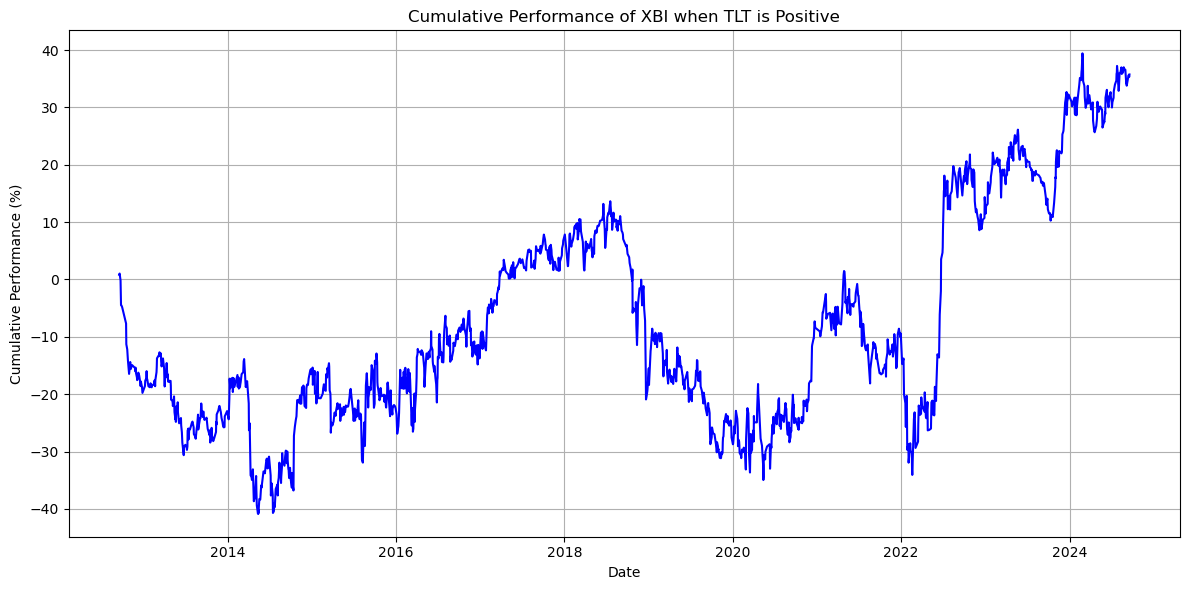

In [84]:
# Plots the cumulative performance using our matplotlib library
plt.figure(figsize=(12, 6))
plt.plot(xbivstlt['Cumulative XBI Performance'], linestyle='-', color='b')
plt.title('Cumulative Performance of XBI when TLT is Positive')
plt.xlabel('Date')
plt.ylabel('Cumulative Performance (%)')
plt.grid(True)
plt.tight_layout()


In [78]:
# Import yfinance library to retrieve data for SPY
import yfinance as yf
SPY = yf.download('SPY', start='2014-09-17',end='2024-09-17')

# Creates two columns from the 'SPY' dataframe: 'Open to Close' and 'Close to Open'
SPY['Open to Close'] = (SPY['Close'] - SPY['Open']) / SPY['Open']*100
SPY['Close to Close'] = SPY['Close'].pct_change()*100

[*********************100%***********************]  1 of 1 completed


In [85]:
# Filters rows where 'TLT Close to Open' is > 0.5 and designates the name 'tltlarge' to this new datafram
tltlarge = xbivstlt[xbivstlt['TLT Close to Open'] > 0.5 ] 

# Finds the mean of columns from different dataframes in our data set. 
avg_return_xbi = xbivstlt['XBI Open to Close'].mean() 
avg_return_xbi_large = tltlarge['XBI Open to Close'].mean()
avg_return_spycc = SPY['Close to Close'].mean()

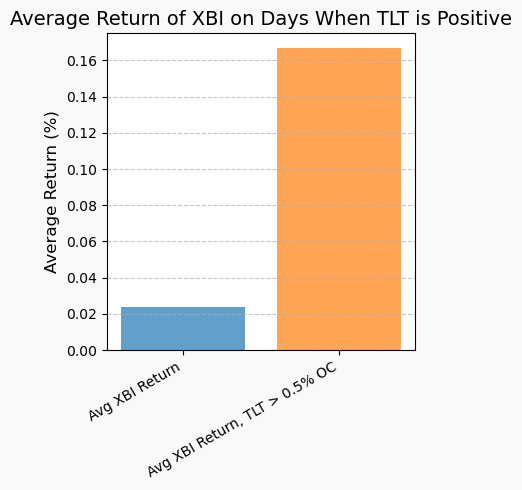

In [110]:
# Asigns our labels, values and colors for our bar graph
labels = ['Avg XBI Return', 'Avg XBI Return, TLT > 0.5% OC']
values = [avg_return_xbi, avg_return_xbi_large]
colors = ['#1f77b4', '#ff7f0e']


# Create the bar graph and axis
plt.figure(figsize=(4, 5),facecolor='#f9f9f9')
bars = plt.bar(labels, values, color=colors, alpha=0.7)

# Customize title and labels
plt.title('Average Return of XBI on Days When TLT is Positive', fontsize=14)
plt.ylabel('Average Return (%)', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


In [93]:
# Creates names to new dataframes that are filtered based on date
xbivstlt_2022 = xbivstlt.loc['2022-01-01':'2023-12-31']
tltlarge_2022 = tltlarge.loc['2022-01-01':'2023-12-31']
spy_2022 = SPY.loc['2022-01-01':'2023-12-31']

# Finds the mean of these columns from our new date-filtered dataframes
avg_xbivstlt_2022 = xbivstlt_2022['XBI Open to Close'].mean()
avg_xbilarge_2022 = tltlarge_2022['XBI Open to Close'].mean()
avg_spy_2022 = spy_2022['Close to Close'].mean()

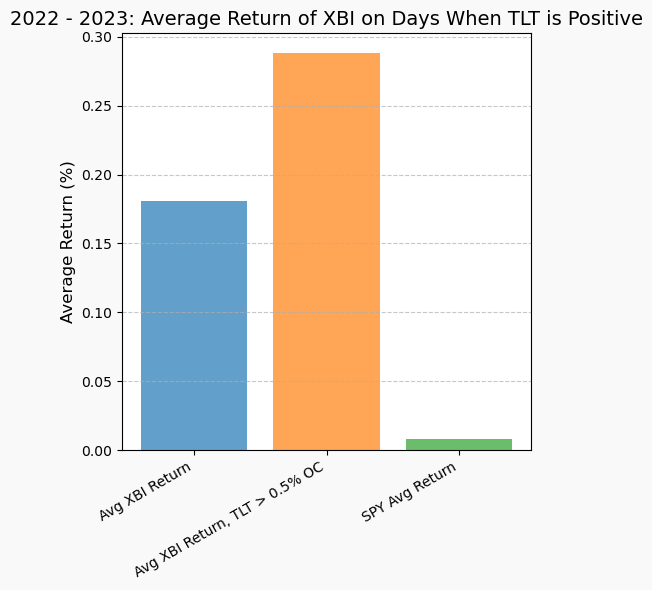

In [108]:
# Asigns our labels, values and colors for our bar graph
labels = [' Avg XBI Return', 'Avg XBI Return, TLT > 0.5% OC', 'SPY Avg Return']
values = [avg_xbivstlt_2022, avg_xbilarge_2022, avg_spy_2022]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 


# Create the figure and axis
plt.figure(figsize=(5, 6),facecolor='#f9f9f9')
bars = plt.bar(labels, values, color=colors, alpha=0.7)



# Customize title and labels
plt.title('2022 - 2023: Average Return of XBI on Days When TLT is Positive', fontsize=14)
plt.ylabel('Average Return (%)', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
